# Introduction to Statistics in Python
Run the hidden code cell below to import the data used in this course.

In [2]:
# Importing numpy and pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing the course datasets
deals = pd.read_csv("datasets/amir_deals.csv")
happiness = pd.read_csv("datasets/world_happiness.csv")
food = pd.read_csv("datasets/food_consumption.csv")

## Take Notes

Add notes about the concepts you've learned and code cells with code you want to keep.

In [3]:
# display full data
food


,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


## Subset for Belgium and USA food consumption

### _Create two DataFrames: one that holds the rows of food_consumption for 'Belgium' and another that holds rows for 'USA'. Call these be_consumption and usa_consumption.
### Calculate the mean and median of kilograms of food consumed per person per year for both countries.__

In [4]:
belgium_consumption = food[food['country']=='Belgium']
USA_consumption = food[food['country']=='USA']

USA_consumption.head()

belgium_consumption.head()  #"""commented so that 'USA_consumption'  can be viewed"""


,Unnamed: 0,country,food_category,consumption,co2_emission
396,397,Belgium,pork,38.65,136.80
397,398,Belgium,poultry,12.20,13.11
398,399,Belgium,beef,15.63,482.31
399,400,Belgium,lamb_goat,1.32,46.23
400,401,Belgium,fish,18.97,30.29


## Mean and Meian

In [5]:
# Calculate the Mean for Both Belgium and Usa fd consumption
print('For Belgium: \n',belgium_consumption['consumption'].agg([np.mean,np.median]),'\n \n')

print('For USA: \n',USA_consumption['consumption'].agg([np.mean,np.median]))

For Belgium: 
 mean      42.132727
median    12.590000
Name: consumption, dtype: float64 
 

For USA: 
 mean      44.65
median    14.58
Name: consumption, dtype: float64


### Subset food_consumption for rows with data about Belgium and the USA.
### Group the subsetted data by country and select only the consumption column.
### Calculate the mean and median of the kilograms of food consumed per person per year in each country using .agg()

In [6]:
# Subset for Belgium and USA only
food[(food['country'] == "Belgium") | (food['country'] == 'USA')].groupby('country')['consumption'].agg([np.mean,np.median])

# This will provide the same above result (just in one line of code and use of ther function 'grouby')

,mean,median
country,,
Belgium,42.132727,12.59
USA,44.650000,14.58


### Subset 'food' data to get the rows where food_category is 'rice'.
### Create a histogram of co2_emission for rice and show the plot.

In [7]:
food[food['food_category']=='rice']

,Unnamed: 0,country,food_category,consumption,co2_emission
8,9,Argentina,rice,8.77,11.22
19,20,Australia,rice,11.03,14.12
30,31,Albania,rice,7.78,9.96
41,42,Iceland,rice,3.89,4.98
52,53,New Zealand,rice,9.16,11.72
...,...,...,...,...,...
1383,1384,Sierra Leone,rice,103.30,132.19
1394,1395,Sri Lanka,rice,109.72,140.41
1405,1406,Indonesia,rice,134.62,172.27
1416,1417,Liberia,rice,94.75,121.25


array([[<AxesSubplot: title={'center': 'Unnamed: 0'}>,
        <AxesSubplot: title={'center': 'consumption'}>],
       [<AxesSubplot: title={'center': 'co2_emission'}>, <AxesSubplot: >]],
      dtype=object)

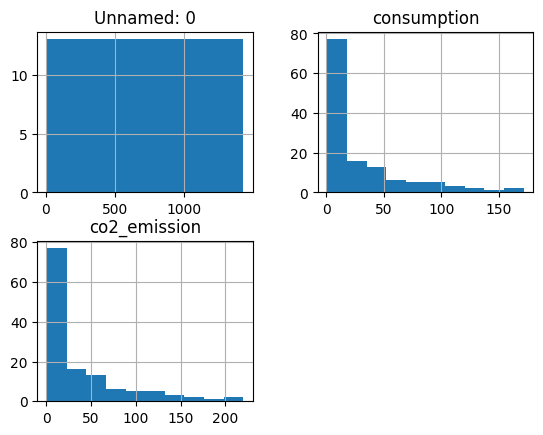

In [8]:
food[food['food_category']=='rice'].hist()

In [9]:
food[food['food_category']=='rice']['co2_emission'].median()

15.2

### "The mean is typically better when the data follow a symmetric distribution. When the data are skewed, the median is more useful because the mean will be distorted by outliers.”

## Measure Of Spread

### Variance

In [10]:
sum((food['consumption'] - np.mean(food['consumption']))**2)/len(food['consumption']-1)
#sum(x-x-mean)**2/n-1         #formular for variance

2480.1020030522795

In [11]:
# Short and quick formular for variance
np.var(food['consumption'],ddof=1)


2481.837553789192

### Standard Deviation

In [12]:
np.std(food['consumption'],ddof=1)

49.81804445970548

### Mean Square Deviation

In [13]:
# food$consumption

### Quantiles and Quartiles

In [14]:
np.quantile(food['consumption'],0.5)

8.89

In [15]:
#Quartiles
np.quantile(food['consumption'],[0,0.25,0.5,0.75,1])

array([  0.    ,   2.365 ,   8.89  ,  28.1325, 430.76  ])

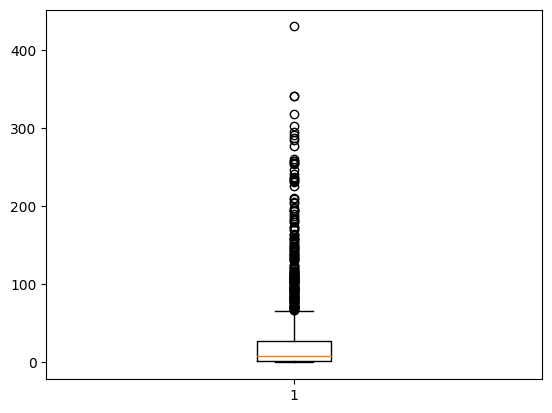

In [16]:
#Boxplot is an example of a Quantile
import matplotlib.pyplot as plt
plt.boxplot(food['consumption'])
plt.show()

# The bottom first part of box is the first quartile
# The middle line is the second quartile
# The  3rd part of the box is the 3rd quartile

# SKipped Lesson Here

## Probability Distribution



In [17]:
# create test data
restaurant_data = {
    'group_id':['A','B','C','D','E','F','G','H','I','J'],
    'group_size':[2,4,6,2,2,2,3,2,4,2]
}
data = pd.DataFrame(restaurant_data)
data.head()

,group_id,group_size
0,A,2
1,B,4
2,C,6
3,D,2
4,E,2


## Create probability distribution $ reset  
Count the number of each group_size in restaurant_groups, then divide by the number of rows in restaurant_groups to calculate the probability of randomly selecting a group of each size. Save as size_dist.
Reset the index of size_dist.
Rename the columns of size_dist to group_size and prob.

In [18]:
# # Create probability distribution
size_dist = data['group_size']/10

# # Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size','prob']
size_dist.head(3)





,group_size,prob
0,0,0.2
1,1,0.4
2,2,0.6


In [19]:
# Create probabilitvalue_countson
size_dist=data['group_size'].value_counts()/data.shape[0]
# Reset index and rename columns
size_dist = size_dist.reset_index()
size_dist.columns = ['group_size', 'prob']

# Calculate expected value
expected_value = sum(size_dist['group_size']*size_dist['prob'])
# expected_value

# Subset groups of size 4 or more
groups_4_or_more = size_dist[size_dist['group_size'] >= 4]

# Sum the probabilities of groups_4_or_more
prob_4_or_more = sum(groups_4_or_more['prob'])
prob_4_or_more


0.30000000000000004

## Continuous Dstribution

### Probability of getting a number less than "n-NUMBER"

In [20]:
from scipy.stats import uniform
number = [i for i in range(30+1)]
minim = number[0]
maxim = number[-1]


# number less than 5
get_less = uniform.cdf(5, minim,maxim)
# uniform.cdf is the function for calculating probability of number less than "n-num"
get_less

0.16666666666666666

### Probability of getting a number High than "n-NUMBER"

In [21]:
get_more = 1-get_less
get_more

0.8333333333333334

### Calculate the probability between outcome a and outcome b
probability between 10 and 20

In [22]:
# prob(number) < b - prob(number) < a

prob_10_20 = uniform.cdf(20,0,30) - uniform.cdf(10,0,30)
prob_10_20



0.3333333333333333

### "uniform.rvs" returns list of probabilities between "n1" and "n-last" with a target num

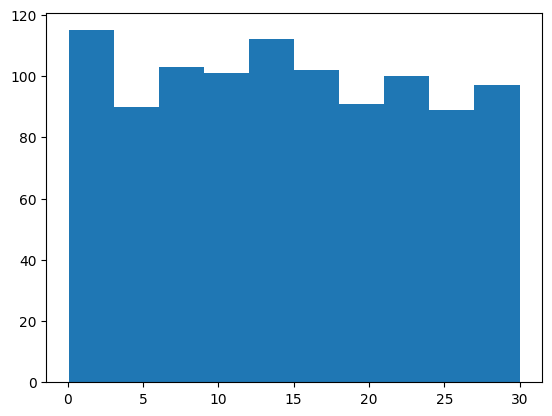

In [23]:
# Generate 1000 wait times between 0 and 30 mins
wait_times = uniform.rvs(0, 30, size=1000)

# Create a histogram of simulated times and show plot
plt.hist(wait_times)
plt.show()

--

--

##                           BINOMIAL DISTRIBUTIONS

This is the probabiity distribution of the number of successs in a sequence of independent trials

**Tools**
- binom from scipy.stats
 [binom.rvs(# of coins,prob of heads/success,size = # of trials)]
-  

### Consider the probability of getting a "head" in a single coin Flip 

In [24]:
# probability of getting a "head" in a single coin Flip
from scipy.stats import binom

binom.rvs(1,0.5,size=1)

array([0])

### Probability of getting Heads Flipping one coin with 8 Trials

In [25]:
binom.rvs(1,0.5,size=8)

array([0, 1, 1, 1, 1, 1, 0, 1])

### Flipping Eight coins with one trial 

In [26]:
binom.rvs(8,0.5,size=1)

array([5])

### Many Flips Many Times

In [27]:
binom.rvs(3, 0.5, size = 10)

array([2, 1, 1, 3, 2, 2, 1, 2, 2, 1])

### Other Probabilities
Consider a coin Heavier at one side, The probability will therefore be different(cant be 0.5)

In [28]:
# adjusting the second argument  to the probability
binom.rvs(3,0.25, size=10)

array([1, 1, 1, 1, 0, 0, 1, 1, 0, 0])

## Binomial Distribution

### Probability of Getting 7 Heads(in die)

In [29]:
# P(heads  = 7)
# binom.pmf(num_heads,num_trials,prob_of_heads)
binom.pmf(7,10,0.5)

0.11718749999999999

### Probability of getting Heads <=7

In [30]:
prob_less_equal_7 = binom.cdf(7,10,0.5)
prob_less_equal_7

0.9453125

### Probability of getting Heads > 7

In [31]:
1-prob_less_equal_7

0.0546875

### Expected Value

In [32]:
# Expected Value = num_of_trials * probability

### Simulating sales deals [Real life scenerio Question]


In [33]:
#--------------------------------------------------Question batch 1----------------------------------------------------

# Assume that Amir usually works on 3 deals per week, and overall, he wins 30% of deals he works on. Each deal has a binary outcome: it's either lost, or won, so you can model his sales deals with a binomial distribution. In this exercise, you'll help Amir simulate a year's worth of his deals so he can better understand his performance.


# Import binom from scipy.stats and set the random seed to 10.
# Simulate 1 deal worked on by Amir, who wins 30% of the deals he works on.
# Simulate a typical week of Amir's deals, or one week of 3 deals.
# Simulate a year's worth of Amir's deals, or 52 weeks of 3 deals each, and store in deals.
# Print the mean number of deals he won per week.

# Import binom from scipy.stats
from scipy.stats import binom

# Set random seed to 10
np.random.seed(10)

# Simulate a single deal
print(binom.rvs(1, 0.3, size=1))

# Simulate 1 week of 3 deals
print(binom.rvs(3,0.3,size=1))

# Simulate 52 weeks of 3 deals
deals = binom.rvs(3,0.3,size=52)

# Print mean deals won per week
print(np.mean(deals))


# --------------------------------------------------------  Question batch 2 --------------------------------------------------

# Just as in the last exercise, assume that Amir wins 30% of deals. He wants to get an idea of how likely he is to close a certain number of deals each week. In this exercise, you'll calculate what the chances are of him closing different numbers of deals using the binomial distribution.


# What's the probability that Amir closes 1 or fewer deals in a week? Save this as prob_less_than_or_equal_1.
# What's the probability that Amir closes more than 1 deal? Save this as prob_greater_than_1.


# Probability of closing <= 1 deal out of 3 deals
prob_less_than_or_equal_1 = binom.cdf(1,3,0.3)
print(prob_less_than_or_equal_1)

# Probability of closing > 1 deal out of 3 deals
prob_greater_than_1 = 1-binom.cdf(1,3,0.3)
print(prob_greater_than_1)


# ------------------------------------------------------ Question batch 3 -----------------------------
# Calculate the expected number of sales out of the 3 he works on that Amir will win each week if he maintains his 30% win rate.
# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate drops to 25%.
# Calculate the expected number of sales out of the 3 he works on that he'll win if his win rate rises to 35%.

# Expected number won with 30% win rate
won_30pct =  3* 0.3
print(won_30pct)

# Expected number won with 25% win rate
won_25pct = 3*0.25
print(won_25pct)

# Expected number won with 35% win rate
won_35pct = 3*0.35
print(won_35pct)






[1]
[0]
0.8461538461538461
0.784
0.21599999999999997
0.8999999999999999
0.75
1.0499999999999998


# NORMAL DISTRIBUTION

**KEY NOTE**
- Shape is commony refered to as a Bell Curve
- Symetrical(left side is a mirror imgae of the right)
- Area beneath the curve is equal to 1
- The Probability nevers reaches zero
- its described by its mean and its standard deviation

### _Question1:_ what percent of women are shorter than "no_of_interest" in a certain distribution

In [34]:

# import norm from scipy.stats
# norm.cdf(no_of_interest,mean,std)

### _Question1:_ what percent of women are Taller  than "no_of_interest" in a certain distribution

In [35]:
# 1- norm.cdf(no_of_interest,mean,std)

### Percentage of Women's Height Between first "no_of_interest" and second "no_of_interest"

In [36]:
# percent_btw = norm.cdf(no_of_interest2,mean,std) - norm.cdf(no_of_interest1,mean,std)

### What height are X% of the women Shorter than

In [37]:
# norm.ppf(X ,mean, std)

### What height are X% of the women Taller than

In [38]:
# norm.ppf(1 - percentage,mean, std)

## TEST EXAMPLE: 1
Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals As part of Amir's performance review, you want to be able to estimate the probability of him selling different amounts, but before you can do this, you'll need to determine what kind of distribution the amount variable follows.



In [39]:
deals = pd.read_csv("datasets/amir_deals.csv")
deals

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17
...,...,...,...,...,...,...
173,174,Product A,Current,Lost,5835.32,23
174,175,Product D,Current,Won,6377.50,12
175,176,Product D,Current,Won,3537.61,28
176,177,Product A,Current,Won,6448.07,34


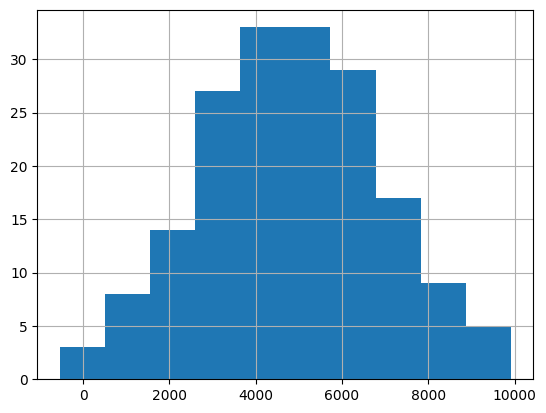

In [40]:
deals['amount'].hist(bins=10)
plt.show()

In [41]:
from scipy.stats import norm
# Since each deal Amir worked on (both won and lost) was different, each was worth a different amount of money. These values are stored in the amount column of amir_deals and follow a normal distribution with a mean of 5000 dollars and a standard deviation of 2000 dollars. As part of his performance metrics, you want to calculate the probability of Amir closing a deal worth various amounts.

# What's the probability of Amir closing a deal worth less than $7500?
prob_less_7500 = norm.cdf(7500, 5000, 2000)
print(prob_less_7500)

# What's the probability of Amir closing a deal worth more than $1000?
prob_over_1000 = 1-norm.cdf(1000,5000,2000)
print(prob_over_1000)

# What's the probability of Amir closing a deal worth between $3000 and $7000?
prob_3000_to_7000 = norm.cdf(7000,5000,2000) - norm.cdf(3000,5000,2000)

print(prob_3000_to_7000)

# What amount will 25% of Amir's sales be less than?
pct_25 = norm.ppf(0.25,5000,2000)
print(pct_25)



0.8943502263331446
0.9772498680518208
0.6826894921370859
3651.0204996078364


<AxesSubplot: >

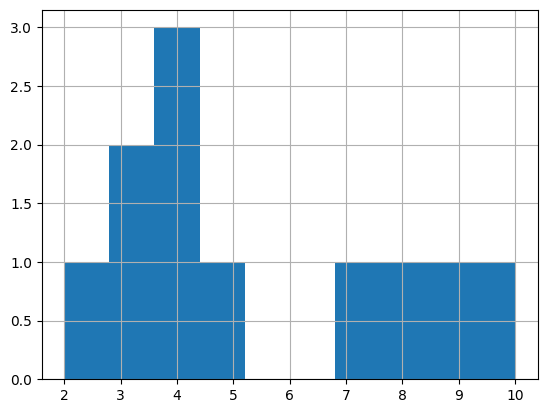

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
dl=[]
for i in range(11):
    dl.append(random.randint(1,11))


data= pd.Series(dl)

data.hist()



In [85]:
import random
inch=[]
pizza_type = []
for i in range(100):
    inch.append(float("%.1f" % random.uniform(15.2,17)))

for j in inch:
    if j  == 16.0:
        pizza_type.append('Normal')
    elif j > 16.0:
        pizza_type.append('Larger')
    elif j < 16.0:
        pizza_type.append('Free')
    


In [86]:
df = {'Pizza Type': pizza_type,
       'Size (inches)' : inch }
data = pd.DataFrame(df)
data

,Pizza Type,Size (inches)
0,Larger,16.3
1,Larger,16.3
2,Larger,16.6
3,Free,15.9
4,Free,15.6
...,...,...
95,Free,15.4
96,Larger,16.8
97,Larger,16.6
98,Normal,16.0


In [91]:
data['Size (inches)'].std()

0.4891757652346743

In [93]:
from scipy.stats import norm 

# probabilty of getting free pizzas
norm.cdf(16.0,data['Size (inches)'].mean(),data['Size (inches)'].std())

0.3640990903004301